In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Hlavačka - Vančo, 50 - 50, dataset 85

In [2]:
# other_train
df_other = pd.read_csv('./other_train.csv', sep=',', index_col=0) # First column is Unnamed
for column_name in df_other:
    if df_other[column_name].dtypes == 'object':
        df_other[column_name] = df_other[column_name].str.strip()

In [3]:
df_other.info()
# There are 22 columns. 10 atributes are float type and 12 are object.
# All columns expect name and adress have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3971 non-null   object 
 3   marital-status    3709 non-null   object 
 4   occupation        3968 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3971 non-null   float64
 7   relationship      3972 non-null   object 
 8   skewness_glucose  3968 non-null   float64
 9   mean_glucose      3974 non-null   float64
 10  capital-gain      3964 non-null   float64
 11  kurtosis_glucose  3970 non-null   float64
 12  education         3969 non-null   object 
 13  fnlwgt            3965 non-null   float64
 14  class             3972 non-null   float64
 15  std_glucose       3966 non-null   float64
 16  income            3971 non-null   object 


In [4]:
df_other.describe() # Fundamental descriptive stats

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000


In [5]:
df_other.head()# medical_info complex object. Can be separated into multiple columns

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,David Hayes,235 Jennifer Throughway Suite 569\r\nNew Antho...,Black,??,Prof-specialty,f,5.0,Not-in-family,-0.197692,141.359375,...,9th,175431.0,0.0,49.842053,<=50K,"{'mean_oxygen':'4.04264214','std_oxygen':'19.4...",United-States,40.0,0.0,Private
1,Stanley Benny,"08954 Johnson Course\r\nNew Lauraville, NV 22019",White,Married-civ-spouse,Exec-managerial,f,13.0,Husband,16.019670,53.968750,...,Bachelors,66473.0,1.0,31.900220,>50K,"{'mean_oxygen':'9.294314381','std_oxygen':'35....",United-States,40.0,0.0,Private
2,Domingo Labriola,"36319 Wiley Drive Suite 094\r\nSouth Michael, ...",Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,f,3.0,Husband,21.803837,2257.812500,...,5th-6th,93206.0,1.0,35.793158,<=50K,"{'mean_oxygen':'138.7876254','std_oxygen':'79....",Philippines,40.0,0.0,Private
3,Ronnie Moore,"0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...",White,Never-married,Other-service,FALSE,10.0,Not-in-family,-0.112191,110.046875,...,Some-college,137604.0,0.0,53.876575,<=50K,"{'mean_oxygen':'3.100334448','std_oxygen':'17....",United-States,40.0,0.0,Private
4,Victor Mcjunkin,"95738 Keller Overpass\r\nKennedyland, MO 71071",White,NaN,Adm-clerical,f,10.0,Not-in-family,-0.309642,137.960938,...,Some-college,174592.0,0.0,51.885451,<=50K,"{'mean_oxygen':'4.203177258','std_oxygen':'23....",United-States,40.0,0.0,Private


In [6]:
df_other.shape[0] - df_other.dropna().shape[0] # there are 337 nan values

337

In [7]:
df_other['address'] # We can separate address into three different columns(street, city, zip_code)

0       235 Jennifer Throughway Suite 569\r\nNew Antho...
1        08954 Johnson Course\r\nNew Lauraville, NV 22019
2       36319 Wiley Drive Suite 094\r\nSouth Michael, ...
3       0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...
4          95738 Keller Overpass\r\nKennedyland, MO 71071
                              ...                        
3978    7401 Donaldson Lake Apt. 338\r\nPort Wayneview...
3979    7060 Tammy Greens Apt. 475\r\nEast Michael, KS...
3980           75021 Bishop Pass\r\nLake Rachel, ID 91709
3981    81727 Rubio Rapids Apt. 057\r\nLawsonburgh, NM...
3982          953 Caldwell Mount\r\nPort Willie, MS 14959
Name: address, Length: 3983, dtype: object

In [8]:
df_other['race'].unique() # Can we change Other to nan or vice-versa?

array(['Black', 'White', 'Asian-Pac-Islander', 'Other', nan,
       'Amer-Indian-Eskimo'], dtype=object)

In [9]:
df_other['marital-status'].value_counts() # We can change '??' values to nan

Married-civ-spouse       1680
Never-married            1180
Divorced                  439
??                        139
Widowed                   111
Separated                 109
Married-spouse-absent      49
Married-AF-spouse           2
Name: marital-status, dtype: int64

In [10]:
df_other['marital-status'] = df_other['marital-status'].replace('??', np.nan)
df_other['marital-status'].value_counts() # We have successfully replaced '??' values with NaN

Married-civ-spouse       1680
Never-married            1180
Divorced                  439
Widowed                   111
Separated                 109
Married-spouse-absent      49
Married-AF-spouse           2
Name: marital-status, dtype: int64

In [11]:
df_other['occupation'].value_counts() # Again we can replace '?' values with NaN

Craft-repair         512
Prof-specialty       499
Exec-managerial      492
Adm-clerical         472
Other-service        424
Sales                423
Machine-op-inspct    228
?                    224
Transport-moving     192
Handlers-cleaners    177
Farming-fishing      119
Tech-support         115
Protective-serv       72
Priv-house-serv       19
Name: occupation, dtype: int64

In [12]:
df_other['occupation'] = df_other['occupation'].replace('?', np.nan)
df_other['occupation'].value_counts() # We have successfully replaced '?' values with NaN

Craft-repair         512
Prof-specialty       499
Exec-managerial      492
Adm-clerical         472
Other-service        424
Sales                423
Machine-op-inspct    228
Transport-moving     192
Handlers-cleaners    177
Farming-fishing      119
Tech-support         115
Protective-serv       72
Priv-house-serv       19
Name: occupation, dtype: int64

In [13]:
# Replace 'f', 'F' and "FALSE" with one stable value "False", apply same method for "True"
df_other['pregnant'].value_counts() 

f        3503
F         194
FALSE     192
t          69
TRUE        5
T           4
Name: pregnant, dtype: int64

In [14]:
df_other['pregnant'] = df_other['pregnant'].replace(['f', 'F', 'FALSE'], 'False')
df_other['pregnant'] = df_other['pregnant'].replace(['t', 'T', 'TRUE'], 'True')
df_other['pregnant'].value_counts()

False    3889
True       78
Name: pregnant, dtype: int64

In [15]:
df_other['education-num'].value_counts() # This column is OK I guess

9.0     1249
10.0     870
13.0     663
14.0     220
11.0     188
7.0      138
6.0      109
12.0     103
4.0       97
15.0      82
5.0       74
16.0      54
3.0       52
8.0       44
2.0       17
1.0       11
Name: education-num, dtype: int64

In [16]:
df_other['relationship'].value_counts() # There are multiple same values, but they are written differently, so we can fix it
df_other['relationship'].unique()

array(['Not-in-family', 'Husband', 'Own-child', 'Not_in_family',
       'Unmarried', 'Own_child', 'Wife', 'Other-relative', nan,
       'Other_relative'], dtype=object)

In [17]:
df_other['relationship'] = df_other['relationship'].replace('Not_in_family', 'Not-in-family')
df_other['relationship'] = df_other['relationship'].replace('Own_child', 'Own-child')
df_other['relationship'] = df_other['relationship'].replace('Other_relative', 'Other-relative')
df_other['relationship'].value_counts()

Husband           1630
Not-in-family      998
Own-child          588
Unmarried          427
Wife               205
Other-relative     124
Name: relationship, dtype: int64

In [18]:
df_other['skewness_glucose'].value_counts() # Maybe we can round this numbers? # 

-0.458587     2
 0.396490     2
 0.165603     2
 3.673929     2
 36.104846    2
             ..
 0.228760     1
-0.119966     1
-1.469010     1
 24.270634    1
 39.078306    1
Name: skewness_glucose, Length: 3932, dtype: int64

In [19]:
df_other['mean_glucose'].value_counts() # Maybe we can round this numbers -8657.812500 ??

 123.031250     4
 124.546875     4
 108.968750     4
 128.218750     4
 122.968750     3
               ..
 88.179688      1
-8657.812500    1
 84.210938      1
 68.234375      1
 124.000000     1
Name: mean_glucose, Length: 3449, dtype: int64

In [20]:
df_other['education'].value_counts() # OK?

HS-grad         1246
Some-college     869
Bachelors        662
Masters          220
Assoc-voc        188
11th             137
10th             109
Assoc-acdm       103
7th-8th           99
Prof-school       82
9th               75
Doctorate         54
5th-6th           52
12th              45
1st-4th           17
Preschool         11
Name: education, dtype: int64

In [21]:
df_other['fnlwgt'].value_counts() # change name of the column to final_weight, how did we get value of this atribute ?

113364.0    4
144064.0    4
34180.0     4
161141.0    4
123983.0    4
           ..
179594.0    1
33619.0     1
285335.0    1
222539.0    1
28160.0     1
Name: fnlwgt, Length: 3671, dtype: int64

In [22]:
df_other['class'].value_counts() # This can be integer

0.0    2954
1.0    1018
Name: class, dtype: int64

In [23]:
df_other['std_glucose'].value_counts() # Maybe round

56.678746    2
46.336825    2
30.322605    2
42.872164    2
49.762971    2
            ..
52.244316    1
58.893506    1
52.811404    1
51.129297    1
36.876648    1
Name: std_glucose, Length: 3929, dtype: int64

In [24]:
df_other['income'].value_counts() # OK

<=50K    2982
>50K      989
Name: income, dtype: int64

In [25]:
df_other['medical_info'].value_counts() # we can separate this object into multiple columns

{'mean_oxygen':'2.81270903','std_oxygen':'18.13688307','kurtosis_oxygen':'7.859968426','skewness_oxygen':'71.29944944'}           2
{'mean_oxygen':'1.489966555','std_oxygen':'12.03064925','kurtosis_oxygen':'13.17410621','skewness_oxygen':'218.3786571'}          2
{'mean_oxygen':'3.091137124','std_oxygen':'15.97387777','kurtosis_oxygen':'7.50088876','skewness_oxygen':'76.03836498'}           2
{'mean_oxygen':'2.530936455','std_oxygen':'15.3560272','kurtosis_oxygen':'8.365814198999999','skewness_oxygen':'90.16391681'}     2
{'mean_oxygen':'22.73327759','std_oxygen':'49.30776594','kurtosis_oxygen':'2.716095654','skewness_oxygen':'7.546922134'}          2
                                                                                                                                 ..
{'mean_oxygen':'1.7123745819999998','std_oxygen':'11.24718682','kurtosis_oxygen':'12.55575371','skewness_oxygen':'230.382285'}    1
{'mean_oxygen':'19.77006689','std_oxygen':'53.06667233','kurtosis_oxygen':'2

In [26]:
df_other['native-country'].value_counts() # replace '?' with NaN

United-States         3554
Mexico                  86
?                       58
Philippines             25
Germany                 17
India                   15
Canada                  14
Guatemala               13
Puerto-Rico             11
Japan                   11
Jamaica                 11
Cuba                    11
Taiwan                  10
England                 10
China                   10
Italy                   10
Dominican-Republic      10
South                    9
El-Salvador              9
Poland                   8
Vietnam                  7
Nicaragua                6
Trinadad&Tobago          5
Haiti                    5
Laos                     5
Scotland                 5
Ecuador                  4
Peru                     4
Columbia                 4
Iran                     3
Portugal                 3
Hong                     3
Cambodia                 2
France                   2
Honduras                 2
Greece                   2
Hungary                  2
T

In [27]:
df_other['native-country'] = df_other['native-country'].replace('?', np.nan)
df_other['native-country'].value_counts() # # We have succesfully replaced '?' values with NaN

United-States         3554
Mexico                  86
Philippines             25
Germany                 17
India                   15
Canada                  14
Guatemala               13
Puerto-Rico             11
Jamaica                 11
Japan                   11
Cuba                    11
Italy                   10
Taiwan                  10
Dominican-Republic      10
China                   10
England                 10
El-Salvador              9
South                    9
Poland                   8
Vietnam                  7
Nicaragua                6
Trinadad&Tobago          5
Laos                     5
Haiti                    5
Scotland                 5
Columbia                 4
Ecuador                  4
Peru                     4
Iran                     3
Portugal                 3
Hong                     3
Cambodia                 2
Hungary                  2
France                   2
Greece                   2
Honduras                 2
Thailand                 1
N

In [28]:
df_other['hours-per-week'].value_counts() # OK

40.0    1860
50.0     359
45.0     208
60.0     173
35.0     160
        ... 
29.0       1
81.0       1
67.0       1
68.0       1
77.0       1
Name: hours-per-week, Length: 76, dtype: int64

In [29]:
df_other['capital-loss'].value_counts() # OK

0.0       3815
1887.0      23
1977.0      22
1902.0      15
2415.0      10
1590.0       7
1485.0       7
1876.0       5
1848.0       5
1741.0       3
2258.0       3
2042.0       3
1740.0       3
1980.0       3
1092.0       3
1672.0       3
1628.0       2
1721.0       2
1504.0       2
1579.0       2
1594.0       2
2339.0       2
323.0        2
2377.0       2
1719.0       2
2174.0       2
2444.0       2
2179.0       1
1408.0       1
1258.0       1
1380.0       1
625.0        1
2057.0       1
2051.0       1
880.0        1
2002.0       1
1573.0       1
1762.0       1
1602.0       1
1669.0       1
2603.0       1
2352.0       1
1617.0       1
2559.0       1
2824.0       1
2392.0       1
Name: capital-loss, dtype: int64

In [30]:
df_other['workclass'].value_counts() # Again we can replace '?' with NaN

Private             2770
Self-emp-not-inc     293
Local-gov            260
?                    227
State-gov            150
Self-emp-inc         142
Federal-gov          124
Without-pay            2
Name: workclass, dtype: int64

In [31]:
df_other['workclass'] = df_other['workclass'].replace('?', np.nan)
df_other['workclass'].value_counts()

Private             2770
Self-emp-not-inc     293
Local-gov            260
State-gov            150
Self-emp-inc         142
Federal-gov          124
Without-pay            2
Name: workclass, dtype: int64

In [32]:
df2 = pd.DataFrame() 

# Iterate through every row and take values from medical_info column
for _,column_data in df_other['medical_info'].iteritems(): 
    if isinstance(column_data, str): # If value isn't nan
        column_data = column_data[1:-1] # Delect curly brackets from start and end of string
        column_data_split = column_data.split(',') # Split string by comma

        row = {} 
        for name_value in column_data_split: # Iterate through split string
            name_value_split = name_value.split(':') # Split into name of column and value of columns
            # Store value into dictionary with name of the column as a key
            row[name_value_split[0][1:-1]] = [np.float(name_value_split[1][1:-1])] # Get rid of '' by [1:-1]

        row_data_frame = pd.DataFrame(row) # Convert dictionary into DataFrame
        df2 = df2.append(row_data_frame, ignore_index=True) # Append row_data_frame into df2
    else: # Value is nan, append nan row into df2
        df2 = df2.append(pd.Series(np.nan), ignore_index=True)
        
df2 = df2.drop(columns=[0]) # Drop last column

# Add values from df2 to main df
for column_name in df2.columns:
    df_other[column_name] = df2[column_name]

In [33]:
del df_other['medical_info'] # medical info is already divided into another columns, so we can erase it

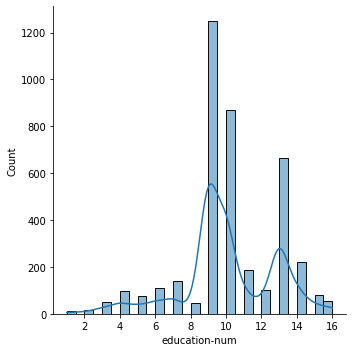

In [34]:
sns.displot(df_other['education-num'], kde=True, bins=30)

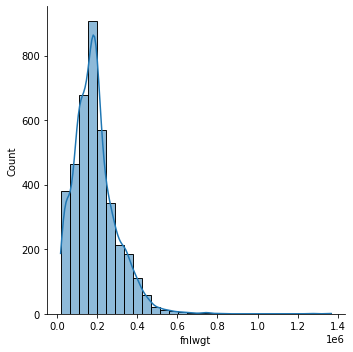

In [35]:
sns.displot(df_other['fnlwgt'], kde=True, bins=30)

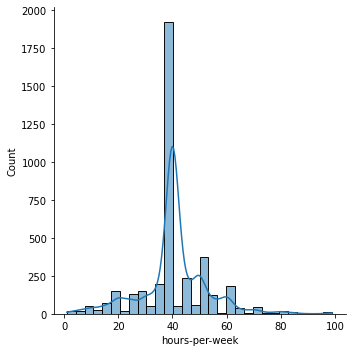

In [36]:
sns.displot(df_other['hours-per-week'], kde=True, bins=30)

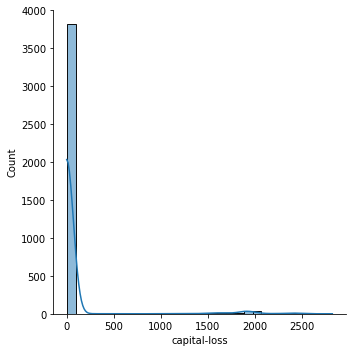

In [37]:
sns.displot(df_other['capital-loss'], kde=True, bins=30)

<AxesSubplot:>

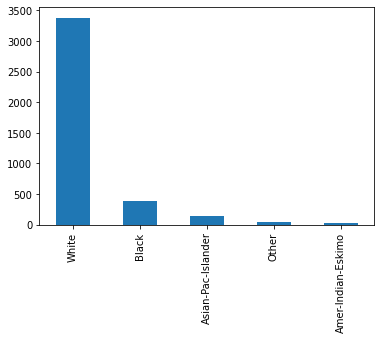

In [38]:
df_other['race'].value_counts().plot(kind='bar')

<AxesSubplot:>

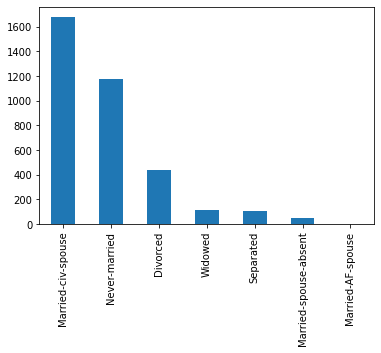

In [39]:
df_other['marital-status'].value_counts().plot(kind='bar')

<AxesSubplot:>

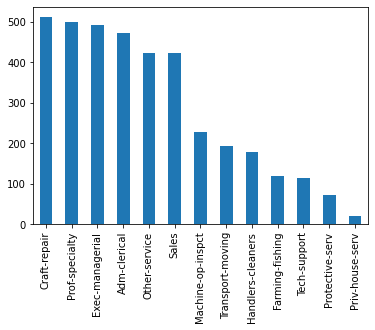

In [40]:
df_other['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

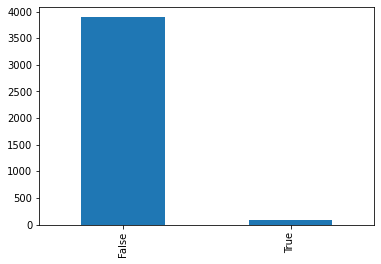

In [41]:
df_other['pregnant'].value_counts().plot(kind='bar')

<AxesSubplot:>

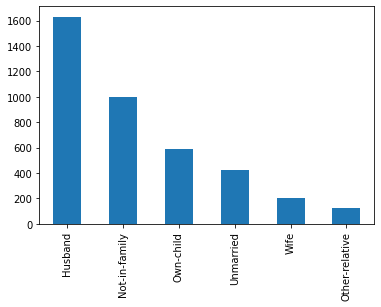

In [42]:
df_other['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

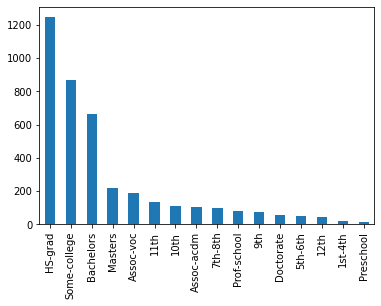

In [43]:
df_other['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

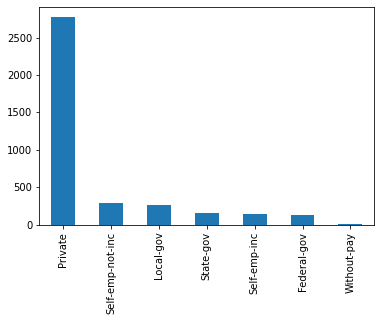

In [44]:
df_other['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

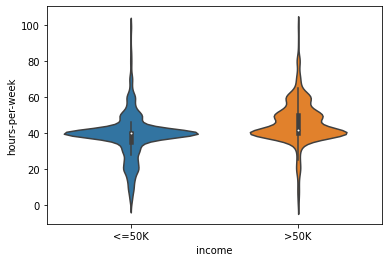

In [45]:
sns.violinplot(x='income', y='hours-per-week', data=df_other)

Ľudia, ktorí pracujú viac hodín týždenne zarábajú viac peňazí :O

<AxesSubplot:xlabel='education-num', ylabel='income'>

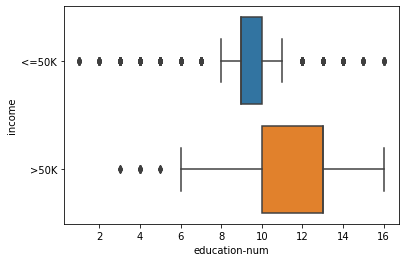

In [46]:
sns.boxplot(x='education-num', y='income', data=df_other)

Ľudia, ktorí majú vyštudovaných viacej rokov zarábajú v priemere viac.

In [47]:
df_other.corr() 

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
education-num,1.000000,-0.011979,0.012340,0.121256,-0.010947,-0.051732,-0.021412,-0.004888,0.143040,0.090149,-0.024489,-0.019374,0.009519,0.004202
skewness_glucose,-0.011979,1.000000,-0.009434,0.000182,0.961722,-0.024980,0.680597,-0.666135,-0.012818,0.002315,0.552006,0.558740,-0.478425,-0.312380
mean_glucose,0.012340,-0.009434,1.000000,0.024359,-0.005865,-0.022246,-0.015211,0.022384,0.024153,-0.024901,-0.002156,0.007232,0.006508,0.004793
capital-gain,0.121256,0.000182,0.024359,1.000000,-0.007008,0.010546,-0.014670,0.008979,0.096427,-0.028317,-0.008647,-0.015989,0.011686,0.007771
kurtosis_glucose,-0.010947,0.961722,-0.005865,-0.007008,1.000000,-0.024385,0.788871,-0.653934,-0.008163,0.003581,0.596976,0.621312,-0.529755,-0.347505
fnlwgt,-0.051732,-0.024980,-0.022246,0.010546,-0.024385,1.000000,-0.009104,0.026743,-0.021165,-0.034717,-0.010737,-0.018406,0.025284,0.031383
class,-0.021412,0.680597,-0.015211,-0.014670,0.788871,-0.009104,1.000000,-0.500898,0.003044,0.003158,0.519789,0.650819,-0.558887,-0.392809
std_glucose,-0.004888,-0.666135,0.022384,0.008979,-0.653934,0.026743,-0.500898,1.000000,0.018442,-0.007243,-0.203459,-0.275947,0.245069,0.187175
hours-per-week,0.143040,-0.012818,0.024153,0.096427,-0.008163,-0.021165,0.003044,0.018442,1.000000,0.070361,-0.012944,-0.008264,0.001906,-0.000242
capital-loss,0.090149,0.002315,-0.024901,-0.028317,0.003581,-0.034717,0.003158,-0.007243,0.070361,1.000000,0.004495,0.008216,-0.000192,0.001874


In [48]:
# personal_train
df_personal = pd.read_csv("./personal_train.csv", index_col=0, sep=',') # First column was Unnamend

In [49]:
df_personal.describe() # Fundamental descriptive stats

,age
count,3540.000000
mean,51.816949
std,11.914637
min,-1.000000
25%,44.000000
50%,52.000000
75%,60.000000
max,113.000000


In [50]:
df_personal.info() # number of records: 3933, number of atributes: 5
# name = object
# address = object
# age = float
# sex = object
# date_of_birth = object
# there are 393 cells in age column with null value
# other columns don't have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   address        3933 non-null   object 
 2   age            3540 non-null   float64
 3   sex            3933 non-null   object 
 4   date_of_birth  3933 non-null   object 
dtypes: float64(1), object(4)
memory usage: 184.4+ KB


In [51]:
df_personal.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",63.0,Female,1956-10-02
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",58.0,Female,1961-05-14
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47.0,Male,1972-06-19
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",60.0,Female,1959-02-19
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",31.0,Female,1988-08-04


In [52]:
df_addresses = df_personal['address'].replace('\r', ',', regex=True)
df_addresses = df_addresses.replace('\n', ' ', regex=True)
df_addresses = df_addresses.str.split(',')
df_addresses.head()

cities = []
streets = []
zip_codes = []

for address in df_addresses:
    if len(address) < 3: # these records have cities in address
        streets.append(address[0])
        cities.append(None)
        zip_codes.append(address[1])
    else: # these records don't have cities in address
        streets.append(address[0])
        cities.append(address[1])
        zip_codes.append(address[2])
   
df_personal['street'] = streets
df_personal['city'] = cities
df_personal['zip_code'] = zip_codes

df_personal = df_personal.drop('address', axis=1)
df_personal.head()

,name,age,sex,date_of_birth,street,city,zip_code
0,Roscoe Bohannon,63.0,Female,1956-10-02,7183 Osborne Ways Apt. 651,East Andrew,OH 53211
1,Ernest Kline,58.0,Female,1961-05-14,391 Ball Road Suite 961,Flowersborough,IN 57550
2,Harold Hendriks,47.0,Male,1972-06-19,8702 Vincent Square,New Jerryfurt,CO 30614
3,Randy Baptiste,60.0,Female,1959-02-19,2751 Harris Crossroad,West Ashley,CA 30311
4,Anthony Colucci,31.0,Female,1988-08-04,904 Robert Cliffs Suite 186,West Kyle,CO 77139


In [53]:
df_personal.info() # 276 number of cells in city column have null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   age            3540 non-null   float64
 2   sex            3933 non-null   object 
 3   date_of_birth  3933 non-null   object 
 4   street         3933 non-null   object 
 5   city           3657 non-null   object 
 6   zip_code       3933 non-null   object 
dtypes: float64(1), object(6)
memory usage: 245.8+ KB


In [54]:
df_personal.shape[0] - df_personal.dropna().shape[0] # there are 643 nan values

643

In [55]:
df_personal[df_personal.isnull().any(axis=1)] # records with null values

,name,age,sex,date_of_birth,street,city,zip_code
8,Harold Miller,NaN,Female,66-06-24,8514 Elizabeth Crescent,West Joseland,GA 49359
9,Charles Czachorowski,NaN,Male,1957-06-06,6798 Wagner Locks Suite 377,Lake Brenda,DC 53038
10,Robert Grantham,NaN,Male,1971-08-08,822 Adams Plains,New Karen,AK 92114
21,Jeffrey Taylor,42.0,Male,27/04/1977,USNV Kim,None,FPO AA 96043
24,Thaddeus Mackerl,NaN,Female,1969-06-15,8122 Jessica Knolls Apt. 880,Dakotafurt,WV 62098
...,...,...,...,...,...,...,...
3915,Drew Garst,50.0,Male,69-01-03,USNS Duarte,None,FPO AA 22046
3920,David Lackey,44.0,Male,1975-02-15,USNV Patterson,None,FPO AA 81791
3926,Joseph Leroux,59.0,Male,1960/01/04,Unit 7574 Box 5626,None,DPO AE 77296
3930,Jared Kinsey,48.0,Male,1971-05-10,Unit 8416 Box 3801,None,DPO AE 31166


In [56]:
df_personal.head()

,name,age,sex,date_of_birth,street,city,zip_code
0,Roscoe Bohannon,63.0,Female,1956-10-02,7183 Osborne Ways Apt. 651,East Andrew,OH 53211
1,Ernest Kline,58.0,Female,1961-05-14,391 Ball Road Suite 961,Flowersborough,IN 57550
2,Harold Hendriks,47.0,Male,1972-06-19,8702 Vincent Square,New Jerryfurt,CO 30614
3,Randy Baptiste,60.0,Female,1959-02-19,2751 Harris Crossroad,West Ashley,CA 30311
4,Anthony Colucci,31.0,Female,1988-08-04,904 Robert Cliffs Suite 186,West Kyle,CO 77139


<AxesSubplot:>

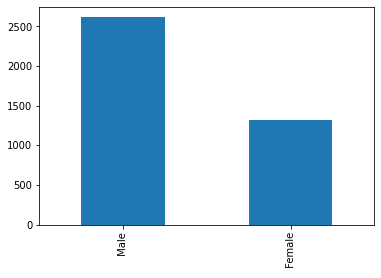

In [57]:
df_personal.sex.value_counts().plot(kind='bar') # there are about 1600 more records about men than about women 

Histogram pre age stĺpec

<AxesSubplot:>

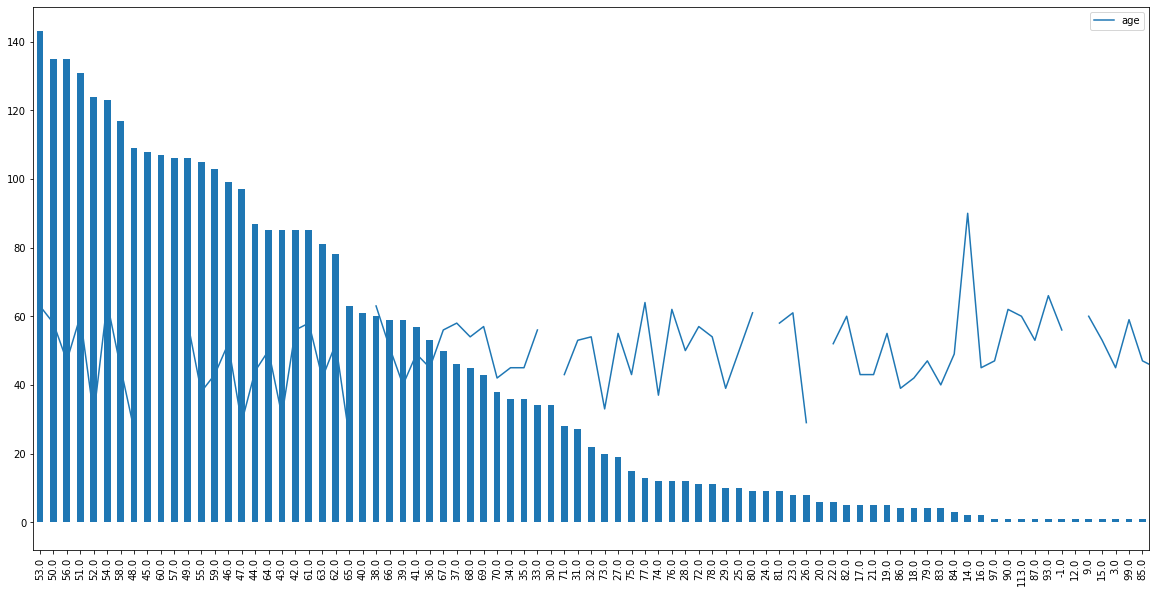

In [58]:
df_personal.plot(figsize=(20,10))
df_personal.age.value_counts().plot(kind='bar')

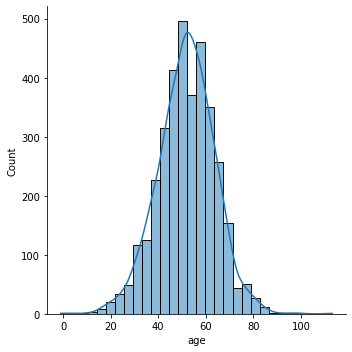

In [59]:
sns.displot(df_personal.age, kde=True, bins=30) # Distribution of age values, Positive kurtosis and normal skewness

In [60]:
df_joined = df_other.join(df_personal.set_index('name'), on='name') # join other train and personal train on name

V date_of_birth nie je jednotný formát hodnôt.

In [61]:
df_joined.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,sex,date_of_birth,street,city,zip_code
0,David Hayes,235 Jennifer Throughway Suite 569\r\nNew Antho...,Black,NaN,Prof-specialty,False,5.0,Not-in-family,-0.197692,141.359375,...,4.042642,19.456469,6.410765,49.813954,45.0,Female,1974-06-18 00:00:00,235 Jennifer Throughway Suite 569,New Anthonyland,PA 19524
1,Stanley Benny,"08954 Johnson Course\r\nNew Lauraville, NV 22019",White,Married-civ-spouse,Exec-managerial,False,13.0,Husband,16.019670,53.968750,...,9.294314,35.958174,4.424007,19.868969,42.0,Male,1977-03-12,08954 Johnson Course,New Lauraville,NV 22019
2,Domingo Labriola,"36319 Wiley Drive Suite 094\r\nSouth Michael, ...",Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,False,3.0,Husband,21.803837,2257.812500,...,138.787625,79.152788,-0.445270,-0.909086,46.0,Male,1973-02-08,36319 Wiley Drive Suite 094,South Michael,WI 41806
3,Ronnie Moore,"0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...",White,Never-married,Other-service,False,10.0,Not-in-family,-0.112191,110.046875,...,3.100334,17.819373,8.434320,85.665564,53.0,Male,1966/05/03,0755 Soto Oval Apt. 443,West Markside,TX 32737
4,Victor Mcjunkin,"95738 Keller Overpass\r\nKennedyland, MO 71071",White,NaN,Adm-clerical,False,10.0,Not-in-family,-0.309642,137.960938,...,4.203177,23.949006,6.531796,45.866688,52.0,Female,20/05/1967,95738 Keller Overpass,Kennedyland,MO 71071


In [62]:
df_joined.info() # There are 31 atributes. 16 are objects and the other 15 are floats. There are 3983 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3971 non-null   object 
 3   marital-status    3570 non-null   object 
 4   occupation        3744 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3971 non-null   float64
 7   relationship      3972 non-null   object 
 8   skewness_glucose  3968 non-null   float64
 9   mean_glucose      3974 non-null   float64
 10  capital-gain      3964 non-null   float64
 11  kurtosis_glucose  3970 non-null   float64
 12  education         3969 non-null   object 
 13  fnlwgt            3965 non-null   float64
 14  class             3972 non-null   float64
 15  std_glucose       3966 non-null   float64
 16  income            3971 non-null   object 


In [63]:
df_joined.describe() # basic statistical data for joined dataframe

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000,3967.000000,3967.000000,3967.000000,3967.000000,3586.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092,18.537297,31.183114,7.405864,91.191022,51.828779
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911,34.828662,22.262766,4.814843,108.575211,11.927593
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000,0.213211,7.370432,-2.597872,-1.976976,-1.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000,2.065635,15.062338,3.628014,12.743507,44.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000,3.237458,20.594663,7.779635,68.358187,52.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000,12.679766,43.333643,10.260328,126.817691,60.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000,217.371238,110.642211,34.539844,1191.000837,113.000000


Joined dataset má 31 atribútov, 15 z nich je typu float a ostatné sú typu object. V datasete je 3983 záznamov.  

In [64]:
del df_joined['address'] # we can also erase disgusting address column, because we have it in detail from personal train

In [65]:
df_joined.shape[0] - df_joined.dropna().shape[0] # there are 1258 nan values

1258

In [66]:
df_joined.head()

,name,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,...,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,sex,date_of_birth,street,city,zip_code
0,David Hayes,Black,NaN,Prof-specialty,False,5.0,Not-in-family,-0.197692,141.359375,0.0,...,4.042642,19.456469,6.410765,49.813954,45.0,Female,1974-06-18 00:00:00,235 Jennifer Throughway Suite 569,New Anthonyland,PA 19524
1,Stanley Benny,White,Married-civ-spouse,Exec-managerial,False,13.0,Husband,16.019670,53.968750,0.0,...,9.294314,35.958174,4.424007,19.868969,42.0,Male,1977-03-12,08954 Johnson Course,New Lauraville,NV 22019
2,Domingo Labriola,Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,False,3.0,Husband,21.803837,2257.812500,0.0,...,138.787625,79.152788,-0.445270,-0.909086,46.0,Male,1973-02-08,36319 Wiley Drive Suite 094,South Michael,WI 41806
3,Ronnie Moore,White,Never-married,Other-service,False,10.0,Not-in-family,-0.112191,110.046875,0.0,...,3.100334,17.819373,8.434320,85.665564,53.0,Male,1966/05/03,0755 Soto Oval Apt. 443,West Markside,TX 32737
4,Victor Mcjunkin,White,NaN,Adm-clerical,False,10.0,Not-in-family,-0.309642,137.960938,0.0,...,4.203177,23.949006,6.531796,45.866688,52.0,Female,20/05/1967,95738 Keller Overpass,Kennedyland,MO 71071


# Hypothesis 1: Prof-specialty has significantly different education number than Craft-repair
Vybrali sme profesie, ktoré majú zhruba rovnaké zastúpenie.

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='occupation'>

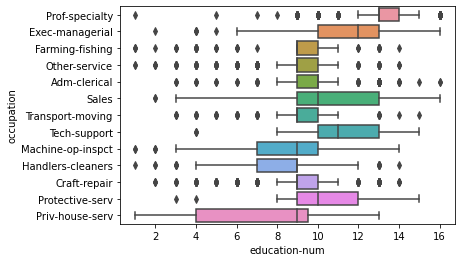

In [67]:
sns.boxplot('education-num', 'occupation', data=df_joined)

In [68]:
prof = df_joined.loc[df_joined.occupation == "Prof-specialty", 'education-num']
craft = df_joined.loc[df_joined.occupation == "Craft-repair", 'education-num']

Štatistické údaje vybraných vzoriek

In [69]:
prof.describe()

count    499.000000
mean      13.110220
std        1.918489
min        1.000000
25%       13.000000
50%       13.000000
75%       14.000000
max       16.000000
Name: education-num, dtype: float64

In [70]:
craft.describe()

count    511.000000
mean       9.070450
std        2.077642
min        2.000000
25%        9.000000
50%        9.000000
75%       10.000000
max       14.000000
Name: education-num, dtype: float64

We have to delete NaN values, so we can use some functions in the future.

In [71]:
nan_value = float("NaN")
prof.dropna()
craft = craft.apply (pd.to_numeric, errors='coerce')
prof = prof.apply (pd.to_numeric, errors='coerce')
prof.replace("", nan_value, inplace=True)

In [72]:
craft.dropna(how='any', inplace=True)
craft = craft.reset_index(drop=True)
prof.dropna(how='any', inplace=True)
prof = prof.reset_index(drop=True)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

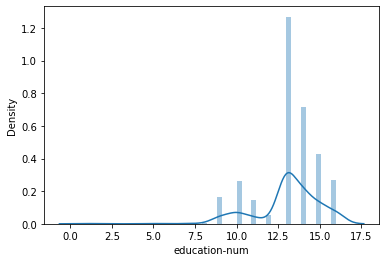

In [73]:
sns.distplot(prof)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

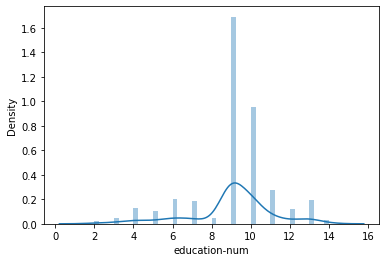

In [74]:
sns.distplot(craft)

We can see the difference of the education-num in displot graph. At first glance, prof-specialty has bigger education-num than craft-repair.

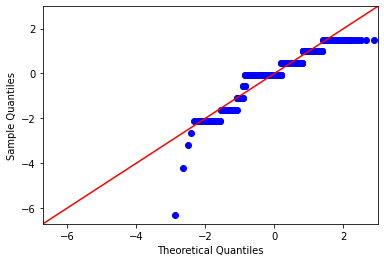

In [75]:
import statsmodels.api as sm
_ = sm.ProbPlot(prof, fit=True).qqplot(line='45')

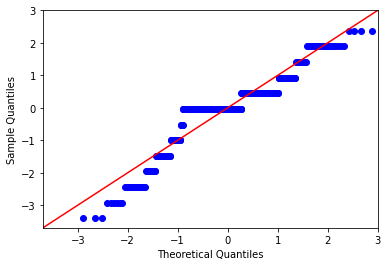

In [76]:
_ = sm.ProbPlot(craft, fit=True).qqplot(line='45')

Dokazovanie hypotézy. Najprv spravíme Shapirov test.

In [77]:
stats.shapiro(prof)

ShapiroResult(statistic=0.8729001879692078, pvalue=9.194888636586025e-20)

In [78]:
stats.shapiro(prof).pvalue < 0.05

True

In [79]:
stats.shapiro(craft)

ShapiroResult(statistic=0.8776384592056274, pvalue=1.2114314687371392e-19)

In [80]:
stats.shapiro(craft).pvalue < 0.05

True

pvalue je menšie ako 0.05, to znamená, že T-test nemôže byť uskutočnený. Namiesto neho spravíme Mannwhitneyu.

In [81]:
stats.levene(prof, craft)

LeveneResult(statistic=0.022422528548436682, pvalue=0.8809984890742923)

Hoci už zo Shapirovho testu vieme, že ttest sa nedá v tomto prípade uplatniť, aj tak uskutočníme Levenov test.

In [82]:
stats.mannwhitneyu(prof, craft) 

MannwhitneyuResult(statistic=20024.5, pvalue=9.521682387651138e-123)

In [83]:
stats.mannwhitneyu(prof, craft).pvalue < 0.001

True

pvalue je menšia ako 0.001, to znamená, že hypotézu0 nezamietame.

Rozdiel medzi education-num pre prof-specialty a craft-repair je štatisticky signifikantný 

Pravdepodobnosť chyby 1. rádu (že nulová hypotéza je pravdivá, a my ju zamietame) je menej ako 1 promile.

<AxesSubplot:xlabel='occupation', ylabel='education-num'>

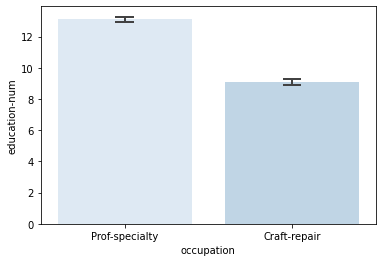

In [84]:
sns.barplot(x='occupation', y='education-num', data=df_joined[(df_joined.occupation == 'Prof-specialty') | (df_joined.occupation == 'Craft-repair')], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Barplot naznačujúci rozdiel priemerov medzi meranými vzorkami.

# Hypothesis 2: People younger than 53 work different amount of time than the ones over 53

In [85]:
df_joined.head()

,name,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,...,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,sex,date_of_birth,street,city,zip_code
0,David Hayes,Black,NaN,Prof-specialty,False,5.0,Not-in-family,-0.197692,141.359375,0.0,...,4.042642,19.456469,6.410765,49.813954,45.0,Female,1974-06-18 00:00:00,235 Jennifer Throughway Suite 569,New Anthonyland,PA 19524
1,Stanley Benny,White,Married-civ-spouse,Exec-managerial,False,13.0,Husband,16.019670,53.968750,0.0,...,9.294314,35.958174,4.424007,19.868969,42.0,Male,1977-03-12,08954 Johnson Course,New Lauraville,NV 22019
2,Domingo Labriola,Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,False,3.0,Husband,21.803837,2257.812500,0.0,...,138.787625,79.152788,-0.445270,-0.909086,46.0,Male,1973-02-08,36319 Wiley Drive Suite 094,South Michael,WI 41806
3,Ronnie Moore,White,Never-married,Other-service,False,10.0,Not-in-family,-0.112191,110.046875,0.0,...,3.100334,17.819373,8.434320,85.665564,53.0,Male,1966/05/03,0755 Soto Oval Apt. 443,West Markside,TX 32737
4,Victor Mcjunkin,White,NaN,Adm-clerical,False,10.0,Not-in-family,-0.309642,137.960938,0.0,...,4.203177,23.949006,6.531796,45.866688,52.0,Female,20/05/1967,95738 Keller Overpass,Kennedyland,MO 71071


In [86]:
under_fifty_three = df_joined.loc[df_joined.age < 53, 'hours-per-week']
over_fifty_three = df_joined.loc[df_joined.age >= 53, 'hours-per-week']

Vyberieme si vzorky a zistíme ich štatistické údaje.

In [87]:
under_fifty_three.describe()

count    1826.000000
mean       39.496166
std        12.103537
min         1.000000
25%        37.000000
50%        40.000000
75%        44.000000
max        99.000000
Name: hours-per-week, dtype: float64

In [88]:
over_fifty_three.describe()

count    1750.000000
mean       41.442286
std        12.547125
min         1.000000
25%        40.000000
50%        40.000000
75%        48.000000
max        99.000000
Name: hours-per-week, dtype: float64

Rovnako ako v predchádzajúcej hypotéze, musíme odstríniť Nan hodnoty.

In [89]:
nan_value = float("NaN")
under_fifty_three.dropna()
over_fifty_three = over_fifty_three.apply (pd.to_numeric, errors='coerce')
under_fifty_three = under_fifty_three.apply (pd.to_numeric, errors='coerce')
under_fifty_three.replace("", nan_value, inplace=True)

In [90]:
over_fifty_three.dropna(how='any', inplace=True)
over_fifty_three = over_fifty_three.reset_index(drop=True)
under_fifty_three.dropna(how='any', inplace=True)
under_fifty_three = under_fifty_three.reset_index(drop=True)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

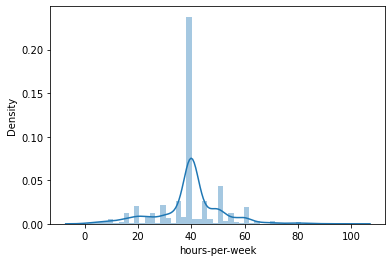

In [91]:
sns.distplot(under_fifty_three)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

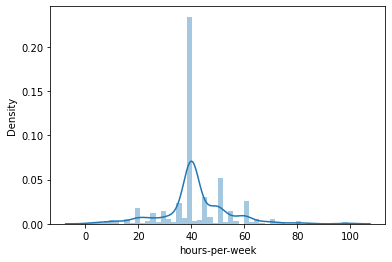

In [92]:
sns.distplot(over_fifty_three)

V tomto prípade rozdiel na displotoch nie je taký jednoznačný, ako pri prvej hypotéze.

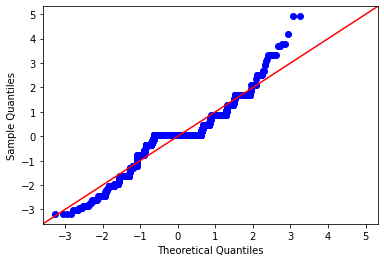

In [93]:
_ = sm.ProbPlot(under_fifty_three, fit=True).qqplot(line='45')

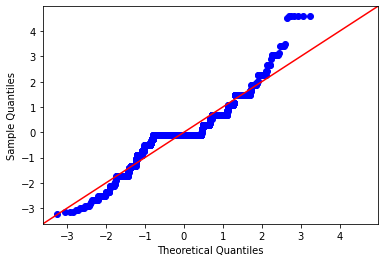

In [94]:
_ = sm.ProbPlot(over_fifty_three, fit=True).qqplot(line='45')

In [95]:
stats.shapiro(under_fifty_three)

ShapiroResult(statistic=0.8959940075874329, pvalue=1.83567622281507e-33)

In [96]:
stats.shapiro(under_fifty_three).pvalue < 0.05

True

In [97]:
stats.shapiro(over_fifty_three)

ShapiroResult(statistic=0.892693281173706, pvalue=2.89922659356962e-33)

In [98]:
stats.shapiro(over_fifty_three).pvalue < 0.05

True

Opäť nemožno vykonať t-test, pvalue sú menšie ako 0.05.

In [99]:
stats.levene(under_fifty_three, over_fifty_three)

LeveneResult(statistic=0.8140678113301768, pvalue=0.36698112815915507)

Na základe výsledku Levenovho testu sa zdá, že vzorky pochádzajú z rozdelení s rôznou varianciou.

In [100]:
stats.mannwhitneyu(under_fifty_three, over_fifty_three)

MannwhitneyuResult(statistic=1461482.5, pvalue=1.627294221213397e-06)

In [101]:
stats.mannwhitneyu(under_fifty_three, over_fifty_three).pvalue < 0.001

True

pvalue je menšia ako 0.001, to znamená, že nulovú hypotézu nezamietame.

Rozdiel odpracovaného času pre ľudí pod 53 rokov a nad 53 rokov je prítomný.

# Hypothesis 3: More educated people have different income than less educated people

<AxesSubplot:xlabel='education-num', ylabel='income'>

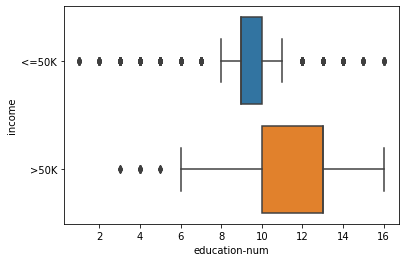

In [102]:
sns.boxplot(x='education-num', y='income', data=df_joined)

Už na prvý pohľad je zrejmé, že platy ľudí, ktorí študovali viac, sú častejšie nad 50 tisíc.

In [103]:
poor = df_joined.loc[df_joined.income == "<=50K", 'education-num']
rich = df_joined.loc[df_joined.income == ">50K", 'education-num']

In [104]:
nan_value = float("NaN")
poor.dropna()
rich = rich.apply (pd.to_numeric, errors='coerce')
poor = poor.apply (pd.to_numeric, errors='coerce')
poor.replace("", nan_value, inplace=True)

In [105]:
rich.dropna(how='any', inplace=True)
rich = rich.reset_index(drop=True)
poor.dropna(how='any', inplace=True)
poor = poor.reset_index(drop=True)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

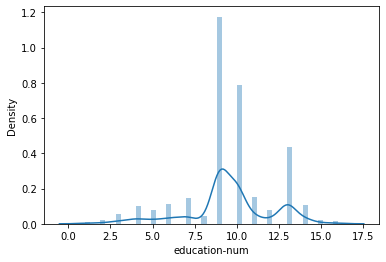

In [223]:
sns.distplot(poor)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

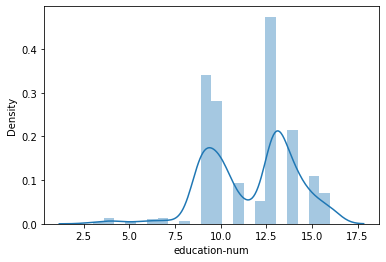

In [224]:
sns.distplot(rich)

Distploty naznačujú značnú rozdielnosť medzi porovnávanými vzorkami.

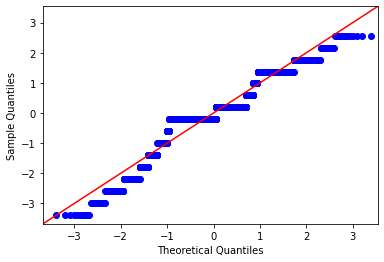

In [94]:
_ = sm.ProbPlot(poor, fit=True).qqplot(line='45')

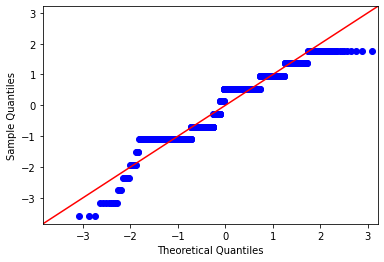

In [95]:
_ = sm.ProbPlot(rich, fit=True).qqplot(line='45')

In [96]:
stats.shapiro(poor)

ShapiroResult(statistic=0.9127867817878723, pvalue=2.4707834652821607e-38)

In [97]:
stats.shapiro(poor).pvalue < 0.05

True

In [98]:
stats.shapiro(rich)

ShapiroResult(statistic=0.9222409725189209, pvalue=3.6064562263267975e-22)

In [99]:
stats.shapiro(rich).pvalue < 0.05

True

Raz a znova nemožno použiť t-test, nakoľko pvalue sú menšie ako 0.05.

In [100]:
stats.levene(poor, rich)

LeveneResult(statistic=20.805011027024538, pvalue=5.238895248836376e-06)

In [101]:
stats.mannwhitneyu(poor, rich) 

MannwhitneyuResult(statistic=802523.5, pvalue=7.67084773516636e-107)

In [103]:
stats.mannwhitneyu(poor, rich).pvalue < 0.001

True

Nulovú hypotézu nezamietame, rozdiel medzi platmi meraných vzoriek sa potvrdil.

Môžme si ešte zobraziť priemery oboch vzoriek.

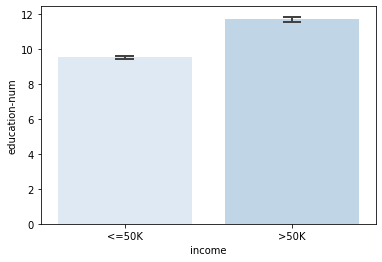

In [104]:
sns.barplot(x='income', y='education-num', data=df_joined[(df_joined.income == '<=50K') | (df_joined.income == '>50K')], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

# Párová analýza spojeného data setu

Ľudia, ktorí majú dieťa pracuju väčšinou menej ako ľudia, ktorí nemajú rodinu.

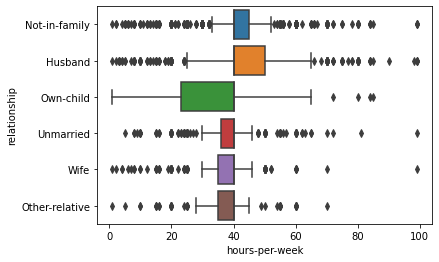

In [105]:
sns.boxplot(x='hours-per-week', y='relationship', data=df_joined)

Od povolania závisí koľko hodín do týždňa ludia pracujú

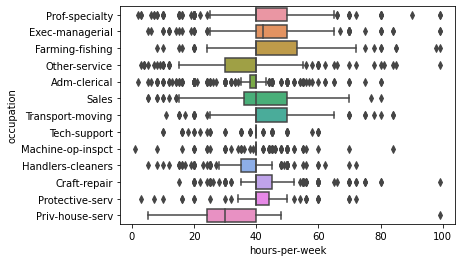

In [106]:
sns.boxplot(x='hours-per-week', y='occupation', data=df_joined)

Muži v priemere pracujú viac ako ženy

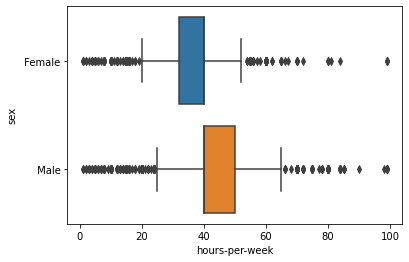

In [107]:
sns.boxplot(x='hours-per-week', y='sex', data=df_joined)

In [108]:
df_joined.corr()[df_joined.corr() > 0.4] 

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age
education-num,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skewness_glucose,NaN,1.000000,NaN,NaN,0.961722,NaN,0.680597,NaN,NaN,NaN,0.552006,0.558740,NaN,NaN,NaN
mean_glucose,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurtosis_glucose,NaN,0.961722,NaN,NaN,1.000000,NaN,0.788871,NaN,NaN,NaN,0.596976,0.621312,NaN,NaN,NaN
fnlwgt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,0.680597,NaN,NaN,0.788871,NaN,1.000000,NaN,NaN,NaN,0.519789,0.650819,NaN,NaN,NaN
std_glucose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Negatívna korelácia

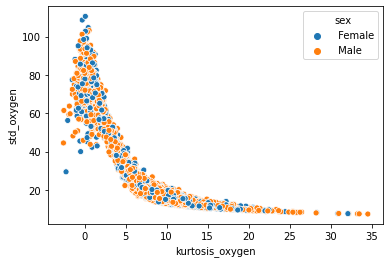

In [109]:
sns.scatterplot(x='kurtosis_oxygen', y='std_oxygen', data=df_joined, hue='sex')

Pozitívna korelácia

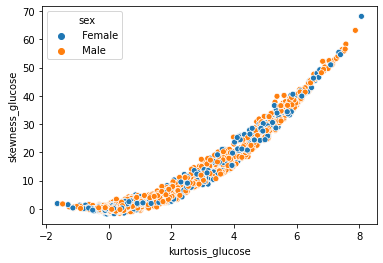

In [110]:
sns.scatterplot(x='kurtosis_glucose', y='skewness_glucose', data=df_joined, hue='sex')

C:\Users\vanco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\vanco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\vanco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\vanco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\vanco\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


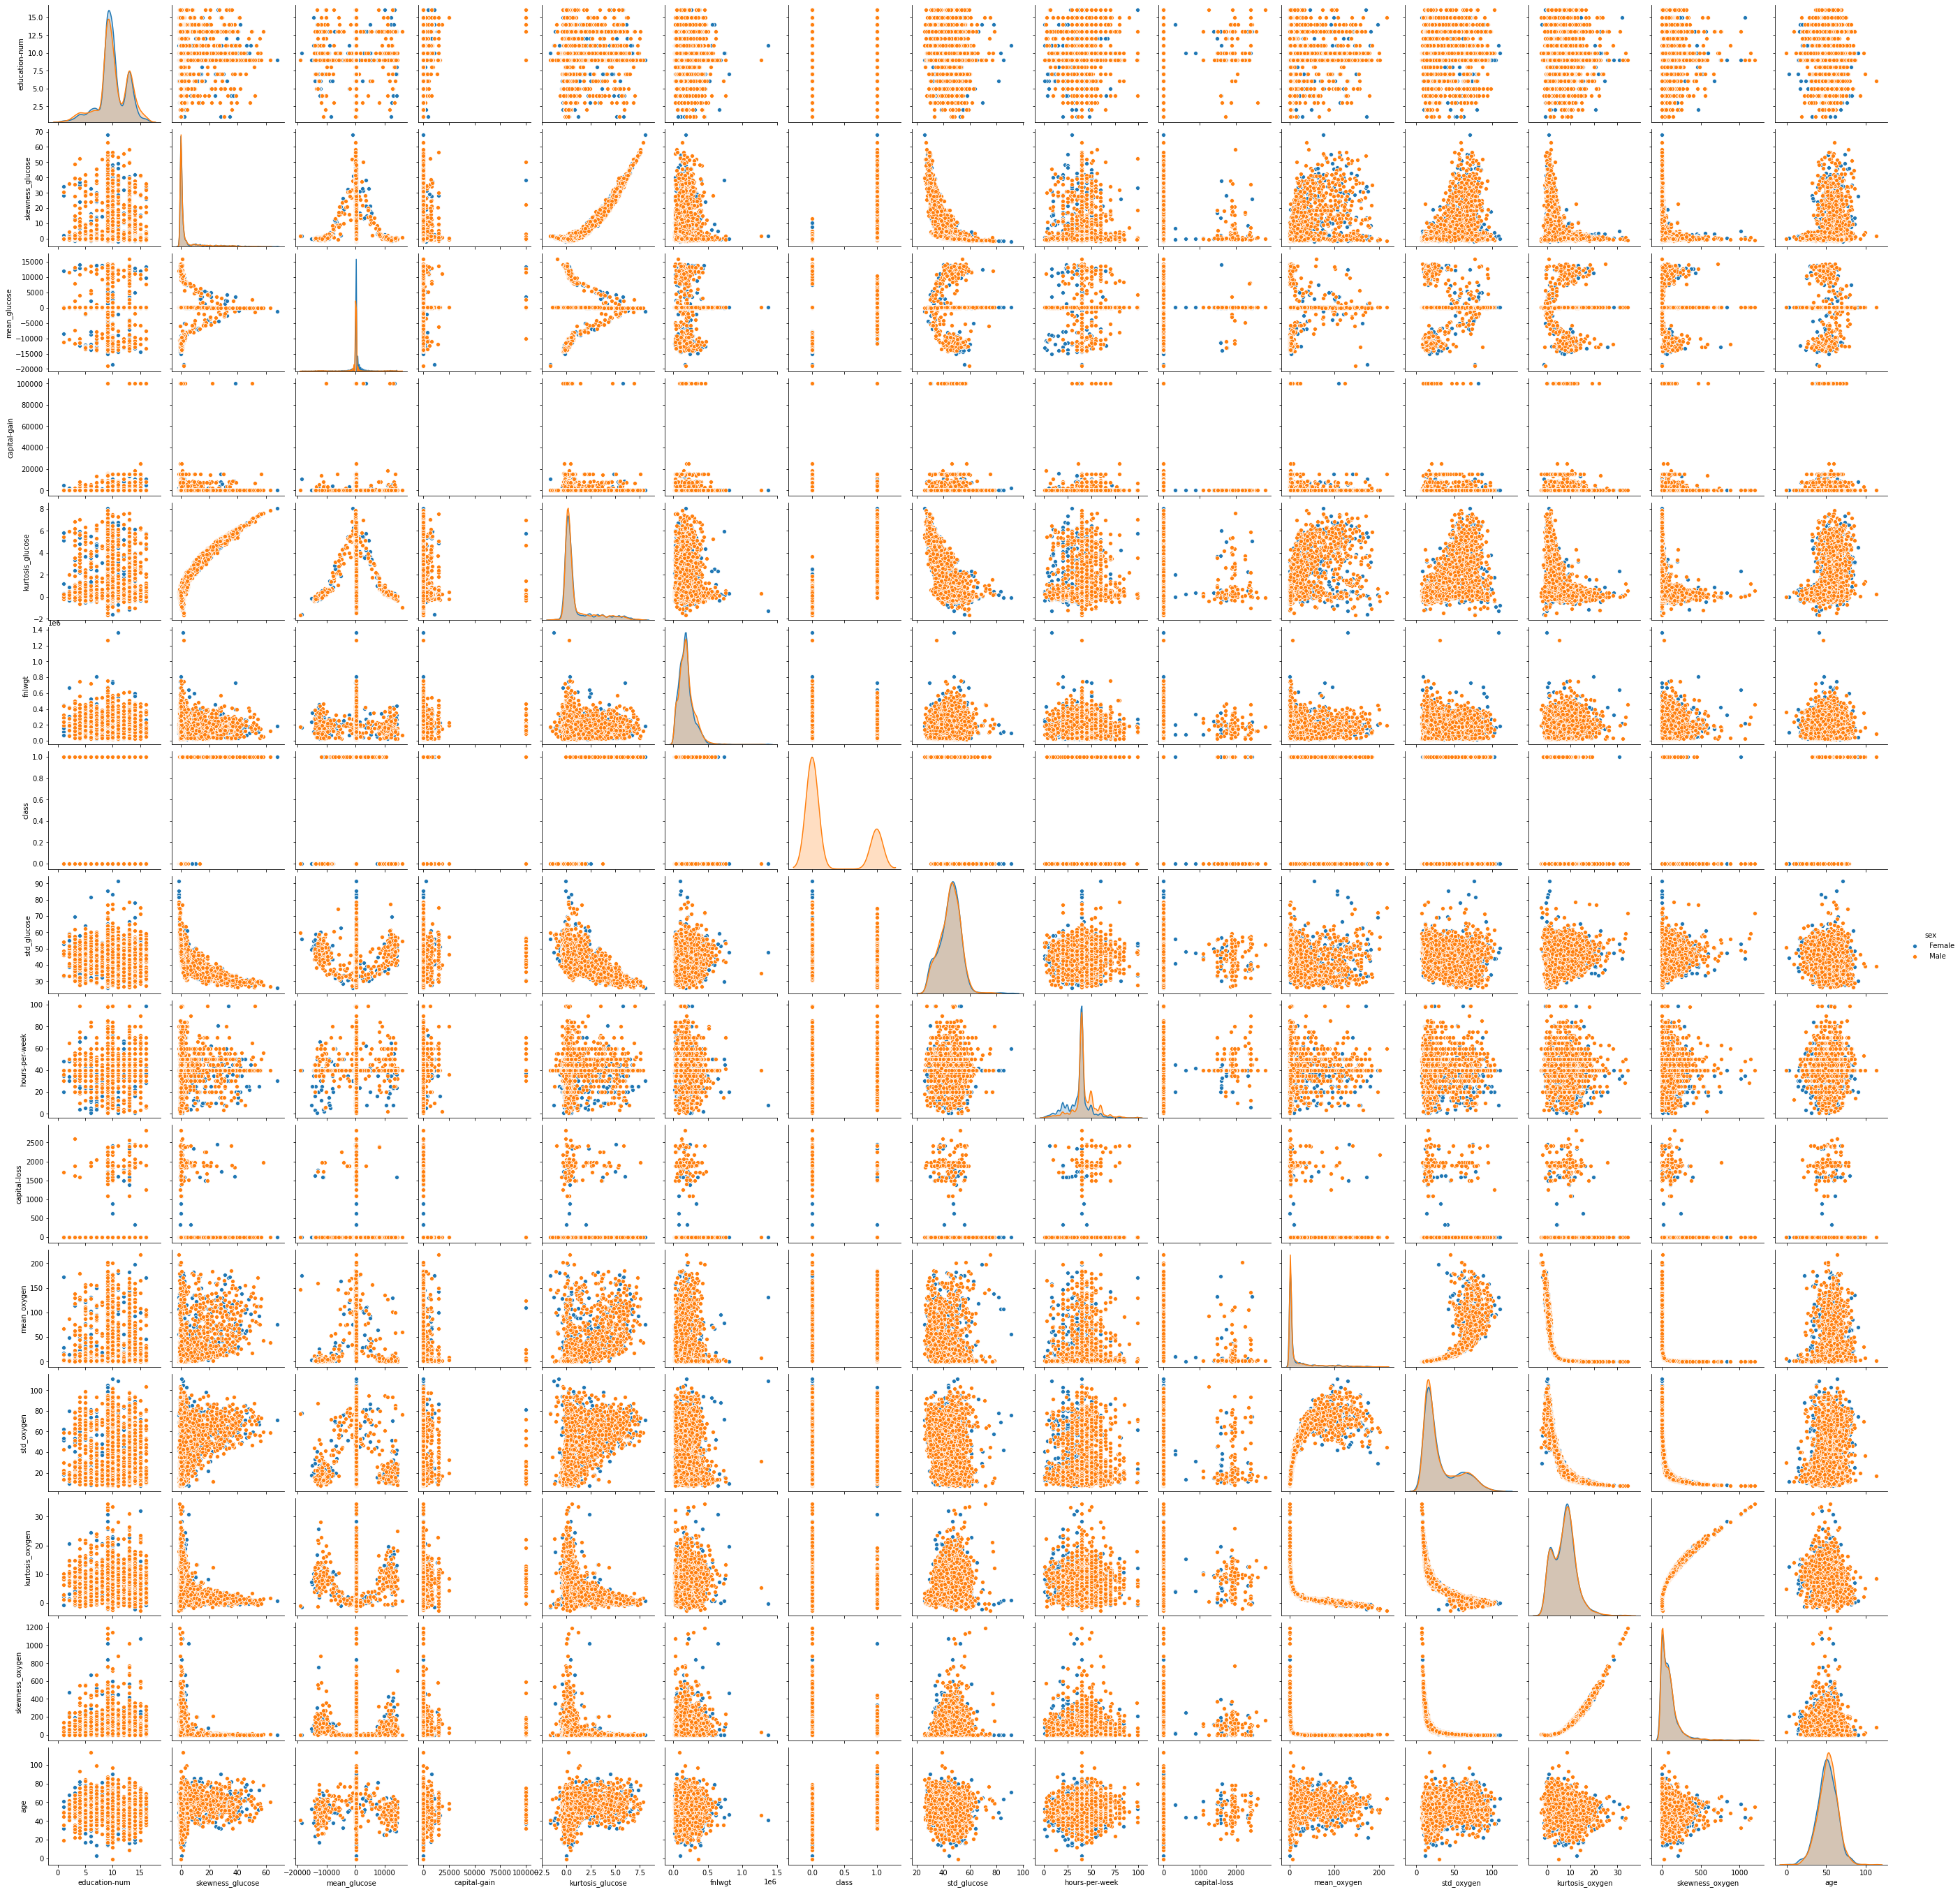

In [111]:
sns.pairplot(data = df_joined, hue='sex')

In [106]:
df_joined.head()

,name,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,...,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,sex,date_of_birth,street,city,zip_code
0,David Hayes,Black,NaN,Prof-specialty,False,5.0,Not-in-family,-0.197692,141.359375,0.0,...,4.042642,19.456469,6.410765,49.813954,45.0,Female,1974-06-18 00:00:00,235 Jennifer Throughway Suite 569,New Anthonyland,PA 19524
1,Stanley Benny,White,Married-civ-spouse,Exec-managerial,False,13.0,Husband,16.019670,53.968750,0.0,...,9.294314,35.958174,4.424007,19.868969,42.0,Male,1977-03-12,08954 Johnson Course,New Lauraville,NV 22019
2,Domingo Labriola,Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,False,3.0,Husband,21.803837,2257.812500,0.0,...,138.787625,79.152788,-0.445270,-0.909086,46.0,Male,1973-02-08,36319 Wiley Drive Suite 094,South Michael,WI 41806
3,Ronnie Moore,White,Never-married,Other-service,False,10.0,Not-in-family,-0.112191,110.046875,0.0,...,3.100334,17.819373,8.434320,85.665564,53.0,Male,1966/05/03,0755 Soto Oval Apt. 443,West Markside,TX 32737
4,Victor Mcjunkin,White,NaN,Adm-clerical,False,10.0,Not-in-family,-0.309642,137.960938,0.0,...,4.203177,23.949006,6.531796,45.866688,52.0,Female,20/05/1967,95738 Keller Overpass,Kennedyland,MO 71071


Z heat mapy vyplýva, že muži väčšinou vykonávajú Craft-repair zamestnanie. Taktiež podáva informácie o tom, ktoré zamestnanie je pre ktoré pohlavie viac zaskúpené. 

<AxesSubplot:xlabel='sex', ylabel='occupation'>

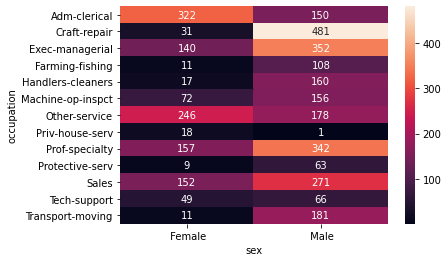

In [113]:
occupation_sex = pd.crosstab(index=df_joined['occupation'], 
                             columns=df_joined['sex'])
occupation_sex
sns.heatmap(occupation_sex, annot=True, fmt="d")

Heat mapa ukazuje, že väčšina mužou je ženatých. A zastupenie relationship kategórie pre ženy je celkom rovnomerne zaskúpené až na Husband, ktorý nemože nastať a Other-relative.

<AxesSubplot:xlabel='sex', ylabel='relationship'>

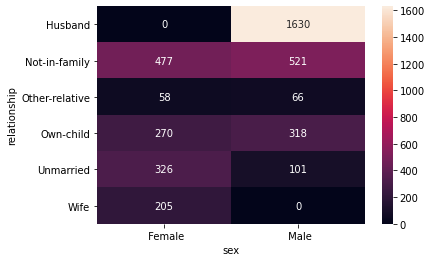

In [112]:
relationship_sex = pd.crosstab(index=df_joined['relationship'], 
                             columns=df_joined['sex'])
# survived_class.index= ["died","survived"]
relationship_sex
sns.heatmap(relationship_sex, annot=True, fmt="d")